## Part 1: Tasks

These tasks focus on fundamental concepts from this week's module.

### Task 1: Random Forest Regression Basics

**Dataset:** `Task-Datasets/task1_random_forest_data.csv`

**Objective:** Build a Random Forest regression model to predict Target based on Feature values.

**Requirements:**
1. Load the dataset and explore its structure
2. Split the data into training (80%) and testing (20%) sets with `random_state=42`
3. Create a Random Forest Regressor with:
   - `n_estimators=100`
   - `max_depth=10`
   - `random_state=42`
4. Train the model and make predictions on the test set
5. Calculate and print the R² score
6. Display feature importance in descending order

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [25]:
# Load and explore the dataset
task1_data = pd.read_csv('Task-Datasets/task1_random_forest_data.csv')

task1_data.head()

,Feature,Target
0,1,150
1,2,200
2,3,350
3,4,600
4,5,1000


In [26]:
task1_data.info()
task1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Feature  20 non-null     int64
 1   Target   20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


,Feature,Target
count,20.00000,20.000000
mean,10.50000,2120.000000
std,5.91608,1369.729132
min,1.00000,150.000000
25%,5.75000,1150.000000
50%,10.50000,1950.000000
75%,15.25000,3375.000000
max,20.00000,4200.000000


### Findings: 
No missing values, No encoding needed as all data is numerical.

In [27]:
# Split the data into features and target variable
X = task1_data[['Feature']]
Y = task1_data['Target']

In [28]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=42)

In [29]:
# Create and train the Random Forest model
RF_model = RandomForestRegressor( n_estimators=100, 
                                 max_depth=10, 
                                 random_state=42 )

#Train the model and make predictions 
RF_model.fit(X_train, Y_train) 
Y_pred = RF_model.predict(X_test)

In [30]:
# Make predictions and calculate R² score
R2 = r2_score (Y_test, Y_pred)
print (f'R2 Score = {R2}' )

R2 Score = 0.878024820806881


In [17]:
# Display feature importance
feature_importances = pd.DataFrame({ "Feature": X.columns, 
                                    "Importance": RF_model.feature_importances_ 
                                    }).sort_values(by="Importance", ascending=False) 
print("\nFeature Importances:") 
print(feature_importances)


Feature Importances:
   Feature  Importance
0  Feature         1.0


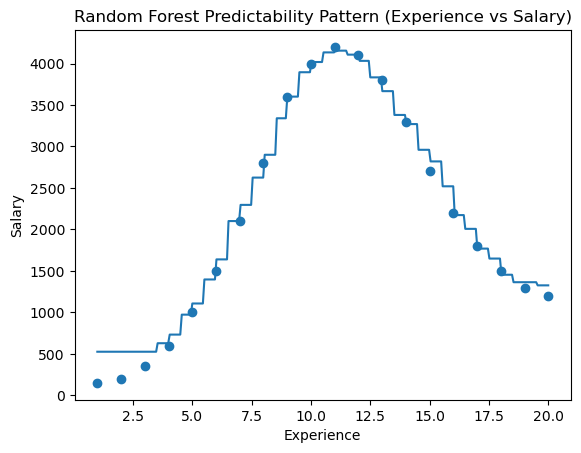

In [35]:
# Plot data points + prediction curve
#Creating a smooth input range as DataFrame 
X_range = pd.DataFrame({
    'Feature': np.linspace(X['Feature'].min(), X['Feature'].max(), 300)
})

# Predict
Y_range_pred = RF_model.predict(X_range)

plt.figure()
# Actual data points
plt.scatter(X, Y)
# Model prediction curve
plt.plot(X_range, Y_range_pred)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Random Forest Predictability Pattern (Experience vs Salary)")
plt.show()

Since the dataset contains only one predictive feature, feature importance ranking is not meaningful. Instead, the predictability pattern of the Random Forest model was visualized by plotting the predicted regression curve against the actual data points. The plot shows a non-linear, step-wise relationship between the feature and the target, reflecting the decision-tree structure of the Random Forest model and how it learns threshold-based patterns in the data.

---

### Task 2: Model Performance Evaluation

**Dataset:** `Task-Datasets/task2_model_evaluation_data.csv`

**Objective:** Evaluate a regression model using multiple performance metrics.

**Requirements:**
1. Load the dataset and split into features (Experience, Training_Hours, Previous_Projects) and target (Salary)
2. Split into training (70%) and testing (30%) sets with `random_state=42`
3. Train a Random Forest Regressor with `n_estimators=50, random_state=42`
4. Make predictions on the test set
5. Calculate and display ALL of the following metrics:
   - R² Score
   - Adjusted R² Score (use formula: 1 - (1-R²) * (n-1)/(n-k-1))
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
6. Create a visualization comparing actual vs predicted values

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
# Load the dataset
task2_data = pd.read_csv('Task-Datasets/task2_model_evaluation_data.csv')

task2_data.info()
task2_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Experience         51 non-null     int64
 1   Training_Hours     51 non-null     int64
 2   Previous_Projects  51 non-null     int64
 3   Salary             51 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


,Experience,Training_Hours,Previous_Projects,Salary
count,51.000000,51.000000,51.000000,51.000000
mean,7.294118,109.470588,8.725490,84.392157
std,4.258141,58.314442,5.513904,31.228883
min,0.000000,15.000000,0.000000,32.000000
25%,4.000000,59.000000,4.000000,59.000000
50%,7.000000,108.000000,9.000000,85.000000
75%,11.000000,162.500000,13.000000,111.000000
max,15.000000,200.000000,19.000000,140.000000


In [ ]:
# Split into features and target
X = task2_data.drop ('Salary', axis =1 )
Y = task2_data['Salary']

In [47]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size= 0.3, 
                                                    random_state=42)
#Check
print(X_train.shape)
print(Y_train.shape)

(35, 3)
(35,)


In [58]:
# Train the model
RF_model = RandomForestRegressor(n_estimators=50, random_state=42)
RF_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [49]:
# Make predictions
Y_pred = RF_model.predict(X_test)


In [59]:
# Calculate all evaluation metrics
r2 = r2_score(Y_test, Y_pred) 
# Adjusted R² formula 
n = X_test.shape[0] # number of observations 
k = X_test.shape[1] # number of predictors 

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1) 
mae = mean_absolute_error(Y_test, Y_pred) 
mse = mean_squared_error(Y_test, Y_pred) 
rmse = np.sqrt(mse) 

#Results
print(f"R² Score: {r2:.4f}") 
print(f"Adjusted R² Score: {adj_r2:.4f}") 
print(f"Mean Absolute Error (MAE): {mae:.4f}") 
print(f"Mean Squared Error (MSE): {mse:.4f}") 
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.9912
Adjusted R² Score: 0.9890
Mean Absolute Error (MAE): 2.1513
Mean Squared Error (MSE): 6.6671
Root Mean Squared Error (RMSE): 2.5821


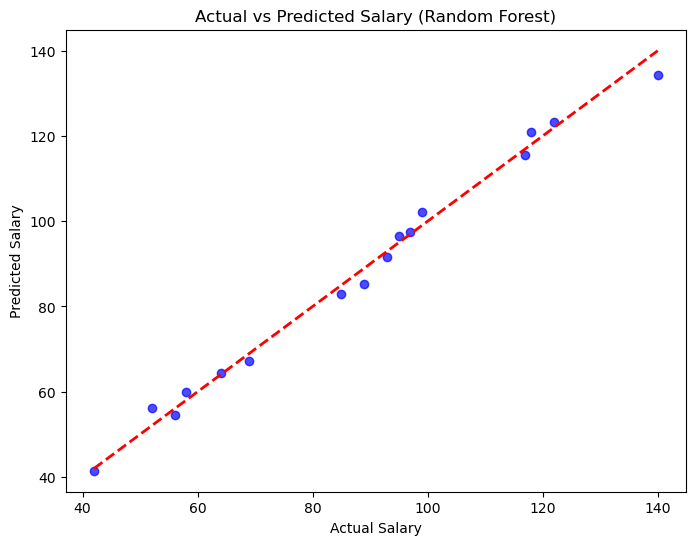

In [55]:
# Visualize actual vs predicted values
plt.figure(figsize=(8,6)) 
plt.scatter(Y_test, Y_pred, color="blue", alpha=0.7) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "r--", lw=2) 
plt.xlabel("Actual Salary") 
plt.ylabel("Predicted Salary") 
plt.title("Actual vs Predicted Salary (Random Forest)") 
plt.show()

---

### Task 3: Binary Classification with Logistic Regression

**Dataset:** `Task-Datasets/task3_classification_data.csv`

**Objective:** Build a logistic regression model to classify emails as spam or not spam.

**Requirements:**
1. Load the dataset and explore its structure
2. Split into features (all columns except 'is_spam') and target ('is_spam')
3. Split into training (80%) and testing (20%) sets with `random_state=42`
4. Create and train a Logistic Regression model with `random_state=42, max_iter=1000`
5. Make predictions on the test set
6. Calculate and display:
   - Confusion Matrix
   - Accuracy Score
   - Precision Score
   - Recall Score
   - F1 Score
7. Interpret the results: Which metric is most important for spam detection and why?

In [143]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [71]:
# Load and explore the dataset
task3_data = pd.read_csv('Task-Datasets/task3_classification_data.csv')

task3_data.info()
task3_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   email_id           100 non-null    object 
 1   word_count         100 non-null    int64  
 2   link_count         100 non-null    int64  
 3   contains_urgent    100 non-null    int64  
 4   sender_reputation  100 non-null    float64
 5   has_attachment     100 non-null    int64  
 6   capital_ratio      100 non-null    float64
 7   exclamation_count  100 non-null    int64  
 8   is_spam            100 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.2+ KB


,word_count,link_count,contains_urgent,sender_reputation,has_attachment,capital_ratio,exclamation_count,is_spam
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,87.030000,4.430000,0.500000,0.519300,0.420000,0.233000,5.600000,0.500000
std,36.595649,4.472712,0.502519,0.379253,0.496045,0.182466,5.724306,0.502519
min,38.000000,0.000000,0.000000,0.060000,0.000000,0.040000,0.000000,0.000000
25%,54.750000,0.000000,0.000000,0.150000,0.000000,0.050000,0.000000,0.000000
50%,80.500000,3.000000,0.500000,0.540000,0.000000,0.205000,3.500000,0.500000
75%,113.500000,8.000000,1.000000,0.892500,1.000000,0.402500,10.000000,1.000000
max,168.000000,14.000000,1.000000,0.950000,1.000000,0.520000,17.000000,1.000000


In [74]:
# Split into features and target
X = task3_data.drop(['is_spam', 'email_id'], axis=1)
Y = task3_data['is_spam'].values

In [75]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.2, 
                                                    random_state= 42 )

In [76]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [78]:
# Make predictions
Y_pred = log_reg.predict(X_test)

In [ ]:
# Calculate and display classification metrics
# When Y_test are the true labels and Y_pred are the predicted labels

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Precision, Recall, F1
precision = precision_score(Y_test, Y_pred, average='binary')  
recall = recall_score(Y_test, Y_pred, average='binary')
f1 = f1_score(Y_test, Y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
 [[12  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



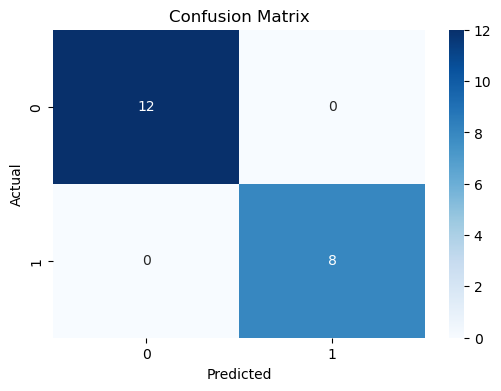

In [ ]:
#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Interpretation:**
Based on our classification report, all metrics (precision, recall, F1‑score, and accuracy) are perfect (1.00). This means the model correctly identified every spam and non‑spam email in the test set.

For spam detection, the most critical metric is recall, because it ensures that all spam emails are correctly identified and none slip through to the inbox. Missing spam (false negatives) is more harmful than occasionally misclassifying a legitimate email. In this case, recall is 1.00, meaning the model successfully caught every spam email.

Since precision is also 1.00, the model didn’t misclassify any legitimate emails as spam either. The combination of perfect recall and precision gives an F1‑score of 1.00, showing the model is performing flawlessly on this dataset.

---

## Part 2: Assignments

These assignments require deeper analysis and comparison of multiple models.

### Assignment 1: Comparative Regression Analysis

**Dataset:** `Assignment-Dataset/assignment1_house_prices.csv`

**Objective:** Compare multiple regression models for house price prediction.

**Requirements:**
1. Load the dataset and perform exploratory data analysis:
   - Display basic statistics
   - Check for missing values
   - Visualize the distribution of house prices
   - Create a correlation heatmap
2. Prepare the data:
   - Split into features and target (price)
   - Split into training (80%) and testing (20%) sets with `random_state=42`
3. Train and evaluate THREE models:
   - Linear Regression
   - Decision Tree Regressor (`max_depth=10, random_state=42`)
   - Random Forest Regressor (`n_estimators=100, max_depth=10, random_state=42`)
4. For each model, calculate:
   - R² Score
   - Adjusted R² Score
   - MAE
   - RMSE
5. Create a comparison table or visualization showing all metrics for all models
6. Provide a written analysis:
   - Which model performed best?
   - Why might Random Forest outperform or underperform compared to simpler models?
   - Which features are most important for price prediction? (use Random Forest feature importance)

In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [84]:
# Load the dataset
assignment1_data = pd.read_csv('Assignment-Dataset/assignment1_house_prices.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Square_Feet       150 non-null    int64  
 1   Bedrooms          150 non-null    int64  
 2   Bathrooms         150 non-null    int64  
 3   Age               150 non-null    int64  
 4   Distance_to_City  150 non-null    float64
 5   Garage            150 non-null    int64  
 6   Pool              150 non-null    int64  
 7   Price             150 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 9.5 KB


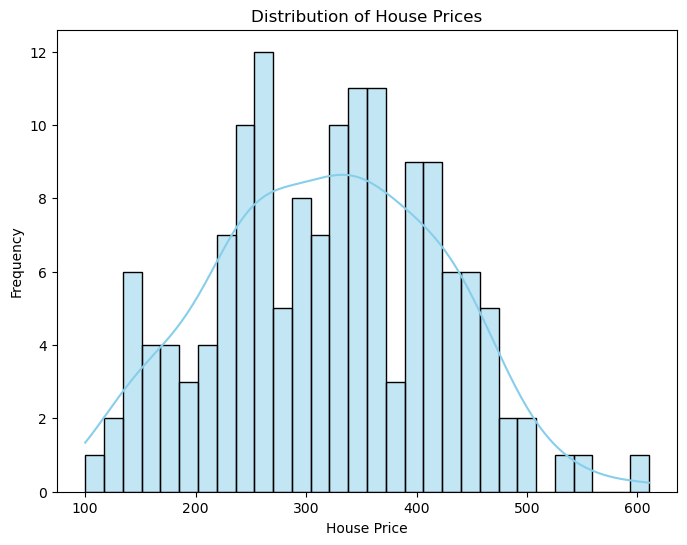

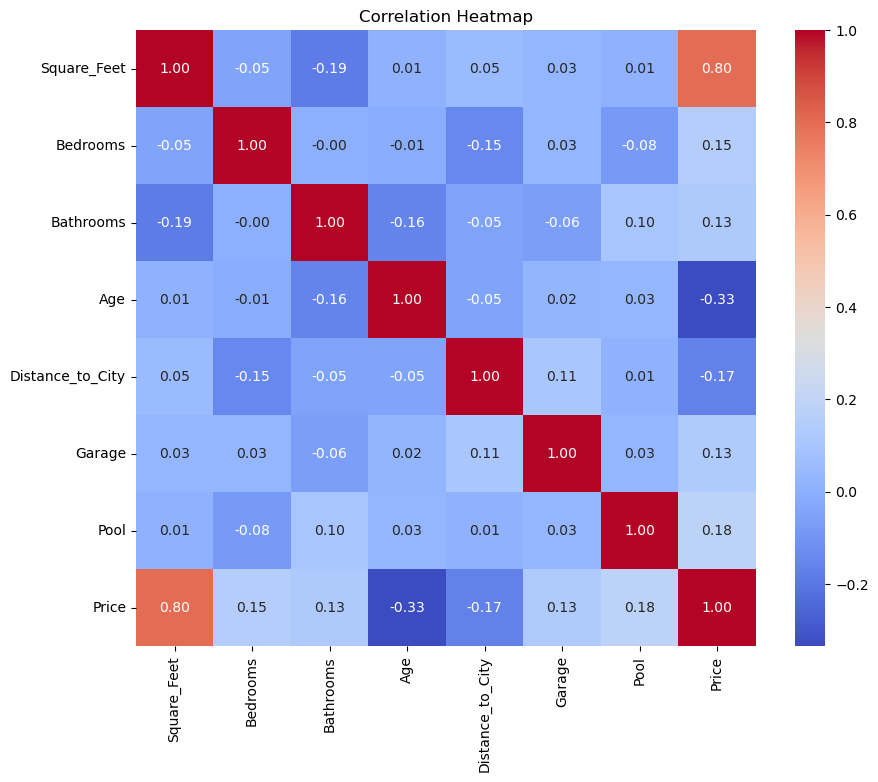

In [90]:
# Exploratory Data Analysis
assignment1_data.info()
assignment1_data.describe()

# Visualize distribution of house prices 
plt.figure(figsize=(8,6)) 
sns.histplot(assignment1_data['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of House Prices") 
plt.xlabel("House Price") 
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8)) 
corr = assignment1_data.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Correlation Heatmap") 
plt.show()

## Insights from Our Dataset - House Price Analysis

### Distribution of House Prices
The histogram of house prices paints a vivid picture of the market:  
- The distribution is roughly **bell-shaped**, peaking around the **250–300 range**, which represents the most common price bracket.  
- The spread shows a healthy variation, with some homes priced lower (around 100) and others stretching toward the luxury end (up to 600).  
- This normal-like distribution suggests a balanced dataset, ideal for predictive modeling since extreme outliers don’t dominate.

### Correlation Heatmap
The correlation heatmap reveals the hidden relationships between housing features and price.  
- **Square Feet (0.80)** stands out as the strongest driver of price which translates to bigger homes almost always command higher value.  
- **Age (-0.33)** shows a moderate negative correlation, meaning older houses tend to be cheaper.  
- **Distance to City (-0.17)** also pulls prices down slightly, reflecting the premium of urban proximity.  
- Features like **Bedrooms, Bathrooms, Garage, and Pool** have weaker but still positive correlations, suggesting they add value but aren’t the main price movers.

In short: **size and age are the heavy hitters**, while amenities provide incremental boosts.


In [94]:
# Data preparation
X = assignment1_data.drop('Price', axis =1) # features
Y = assignment1_data['Price'].values # target

# Split into train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, 
                                                    random_state=42)

In [126]:
# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
#Predict on test set
Y_pred_lin = lin_reg.predict(X_test)
r2 = r2_score(Y_test, Y_pred_lin) 

# Adjusted R² formula 
n = X_test.shape[0] # number of observations 
k = X_test.shape[1] # number of predictors 

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1) 
mae = mean_absolute_error(Y_test, Y_pred_lin) 
mse = mean_squared_error(Y_test, Y_pred_lin) 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lin)) 

# Store results in df
results_lin = { "Model": ["Linear Regression"], 
           "R²": [r2], 
           "Adjusted R²": [adj_r2], 
           "MAE": [mae], 
           "RMSE": [rmse] 
           } 
# Convert to DataFrame for clean display 
results_lin_df = pd.DataFrame(results_lin)

# Round values for readability 
results_lin_df = results_lin_df.round(4) 
print(results_lin_df)

               Model      R²  Adjusted R²      MAE     RMSE
0  Linear Regression  0.8942       0.8606  27.7215  32.5054


In [124]:
# Model 2: Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X_train, Y_train)
#Predict on test set
Y_pred_tree = tree_reg.predict(X_test)
r2 = r2_score(Y_test, Y_pred_tree) 

# Adjusted R² formula 
n = X_test.shape[0] # number of observations 
k = X_test.shape[1] # number of predictors 

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1) 
mae = mean_absolute_error(Y_test, Y_pred_tree) 
mse = mean_squared_error(Y_test, Y_pred_tree) 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_tree)) 

# Store results in df
results_tree = { "Model": ["Decision Tree"], 
           "R²": [r2], 
           "Adjusted R²": [adj_r2], 
           "MAE": [mae], 
           "RMSE": [rmse] 
           } 
# Convert to DataFrame for clean display 
results_tree_df = pd.DataFrame(results_tree)

# Round values for readability 
results_rf_df = results_tree_df.round(4) 
print(results_tree_df)

           Model        R²  Adjusted R²        MAE       RMSE
0  Decision Tree  0.562993     0.423946  53.913303  66.075776


In [128]:
# Model 3: Random Forest Regressor
RF_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
RF_reg.fit(X_train, Y_train)
#Predict on test set
Y_pred_rf = RF_reg.predict(X_test)
r2 = r2_score(Y_test, Y_pred_rf) 

# Adjusted R² formula 
n = X_test.shape[0] # number of observations 
k = X_test.shape[1] # number of predictors 

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1) 
mae = mean_absolute_error(Y_test, Y_pred_rf) 
mse = mean_squared_error(Y_test, Y_pred_rf) 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_rf)) 

# Store results in df
results_rf = { "Model": ["Random Forest"], 
           "R²": [r2], 
           "Adjusted R²": [adj_r2], 
           "MAE": [mae], 
           "RMSE": [rmse] 
           } 
# Convert to DataFrame for clean display 
results_rf_df = pd.DataFrame(results_rf)

# Round values for readability 
results_rf_df = results_rf_df.round(4) 
print(results_rf_df)

           Model     R²  Adjusted R²      MAE     RMSE
0  Random Forest  0.862        0.818  31.8483  37.1375


In [129]:
# Compare all models
comparison_df = pd.concat([results_lin_df, results_tree_df, results_rf_df], 
                          ignore_index=True) 
comparison_df

,Model,R²,Adjusted R²,MAE,RMSE
0,Linear Regression,0.894200,0.860600,27.721500,32.505400
1,Decision Tree,0.562993,0.423946,53.913303,66.075776
2,Random Forest,0.862000,0.818000,31.848300,37.137500


            Feature  Importance
0       Square_Feet    0.681155
3               Age    0.161119
4  Distance_to_City    0.063497
2         Bathrooms    0.038008
1          Bedrooms    0.027528
6              Pool    0.017697
5            Garage    0.010996


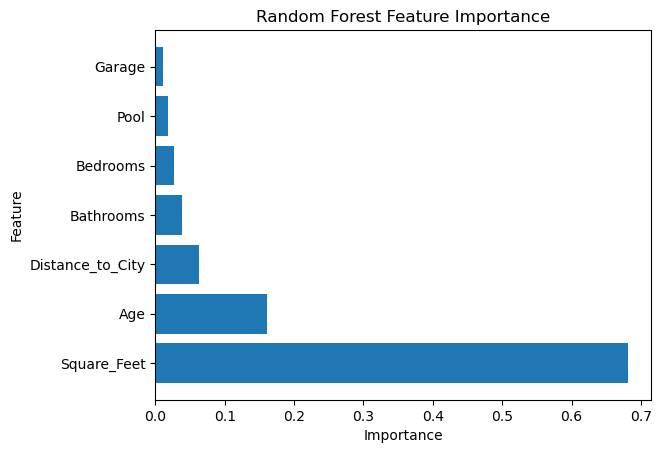

In [135]:
# Feature importance analysis using RF feature importance
importances = RF_reg.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualize Feature Importance
plt.figure()
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance']
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
# Using Permutation Feature Importance for additional validation 
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    RF_reg,
    X_test,
    Y_test,
    n_repeats=150,
    random_state=42,
    scoring='r2'
)

perm_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_df)


            Feature  Importance
0       Square_Feet    1.293138
3               Age    0.208977
4  Distance_to_City    0.044997
1          Bedrooms    0.017772
2         Bathrooms    0.012728
6              Pool    0.003139
5            Garage    0.001824


## Analysis

### Which Model Performed Best?
Looking at the metrics, **Linear Regression (Best Model)** delivered the strongest performance overall with an R² of **0.894** and the lowest error values (MAE ≈ 27.7, RMSE ≈ 32.5). This suggests that, for this dataset, the linear relationships between features and price are strong enough that a simple linear model captures them very effectively.
The **Random Forest** came close (R² ≈ 0.862), but did not surpass Linear Regression. The **Decision Tree**, on the other hand, lagged significantly (R² ≈ 0.563), showing clear signs of overfitting and weaker generalization.


### Why Might Random Forest Outperform or Underperform?
- **Outperforming scenarios:** Random Forest usually shines when relationships are highly non‑linear or when interactions between features are complex. By averaging across many trees, it reduces overfitting and captures subtle patterns that linear models miss.

- **Underperforming scenarios (like here):** If the dominant relationships in the data are largely linear and straightforward, Random Forest’s complexity doesn’t add much value. In fact, it can introduce slight bias and higher error compared to a well‑fitted linear model. It’s also more computationally demanding and less interpretable than Linear Regression.


### Which Features Are Most Important for Price Prediction?
Based on Random Forest feature importance and permutation importance:

Using Random Forest feature importance and permutation importance, the hierarchy of drivers is clear:

**Square_Feet:** By far the most influential predictor (importance ≈ 0.68, permutation ≈ 1.29). Larger homes consistently command higher prices.

**Age:** The second most important factor (≈ 0.16, permutation ≈ 0.21). Older homes tend to reduce value, reflecting depreciation or outdated features.

**Distance_to_City:** Moderate influence (≈ 0.06, permutation ≈ 0.04). Homes farther from the city center are generally less expensive.

**Bathrooms and Bedrooms:** Smaller but positive contributions, adding incremental value.

**Pool and Garage:** Minimal impact compared to the heavy hitters, but still provide slight boosts in price.


---

### Assignment 2: Binary Classification with Model Tuning

**Dataset:** `Assignment-Dataset/assignment2_marketing_campaign.csv`

**Objective:** Build and optimize a classification model to predict customer response to marketing campaign.

**Requirements:**
1. Load and explore the dataset:
   - Check class distribution (Responded vs not Responded)
   - Identify any class imbalance
   - Visualize key features by response status
2. Prepare the data:
   - Split into features and target (Responded)
   - Split into training (75%) and testing (25%) sets with `random_state=42`
3. Train TWO Logistic Regression models:
   - Model A: Default parameters with `random_state=42, max_iter=1000`
   - Model B: With class balancing `class_weight='balanced', random_state=42, max_iter=1000`
4. For each model, calculate and display:
   - Confusion Matrix
   - Accuracy, Precision, Recall, F1-Score
   - ROC Curve and AUC Score
5. Compare the two models:
   - Which performs better overall?
   - How does class balancing affect the results?
   - What is the trade-off between precision and recall?
6. Make business recommendations:
   - Which model would you deploy and why?
   - What threshold would you use for classifying responses?

In [144]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         300 non-null    object
 1   Age                 300 non-null    int64 
 2   Income              300 non-null    int64 
 3   Spending_Score      300 non-null    int64 
 4   Membership_Years    300 non-null    int64 
 5   Previous_Purchases  300 non-null    int64 
 6   Email_Opens         300 non-null    int64 
 7   Website_Visits      300 non-null    int64 
 8   Responded           300 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 21.2+ KB
Class Distribution:
Responded
1    261
0     39
Name: count, dtype: int64


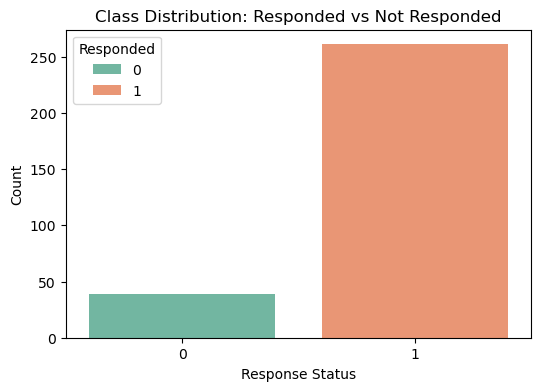


Class Proportions:
Responded
1    0.87
0    0.13
Name: proportion, dtype: float64
Potential class imbalance detected.


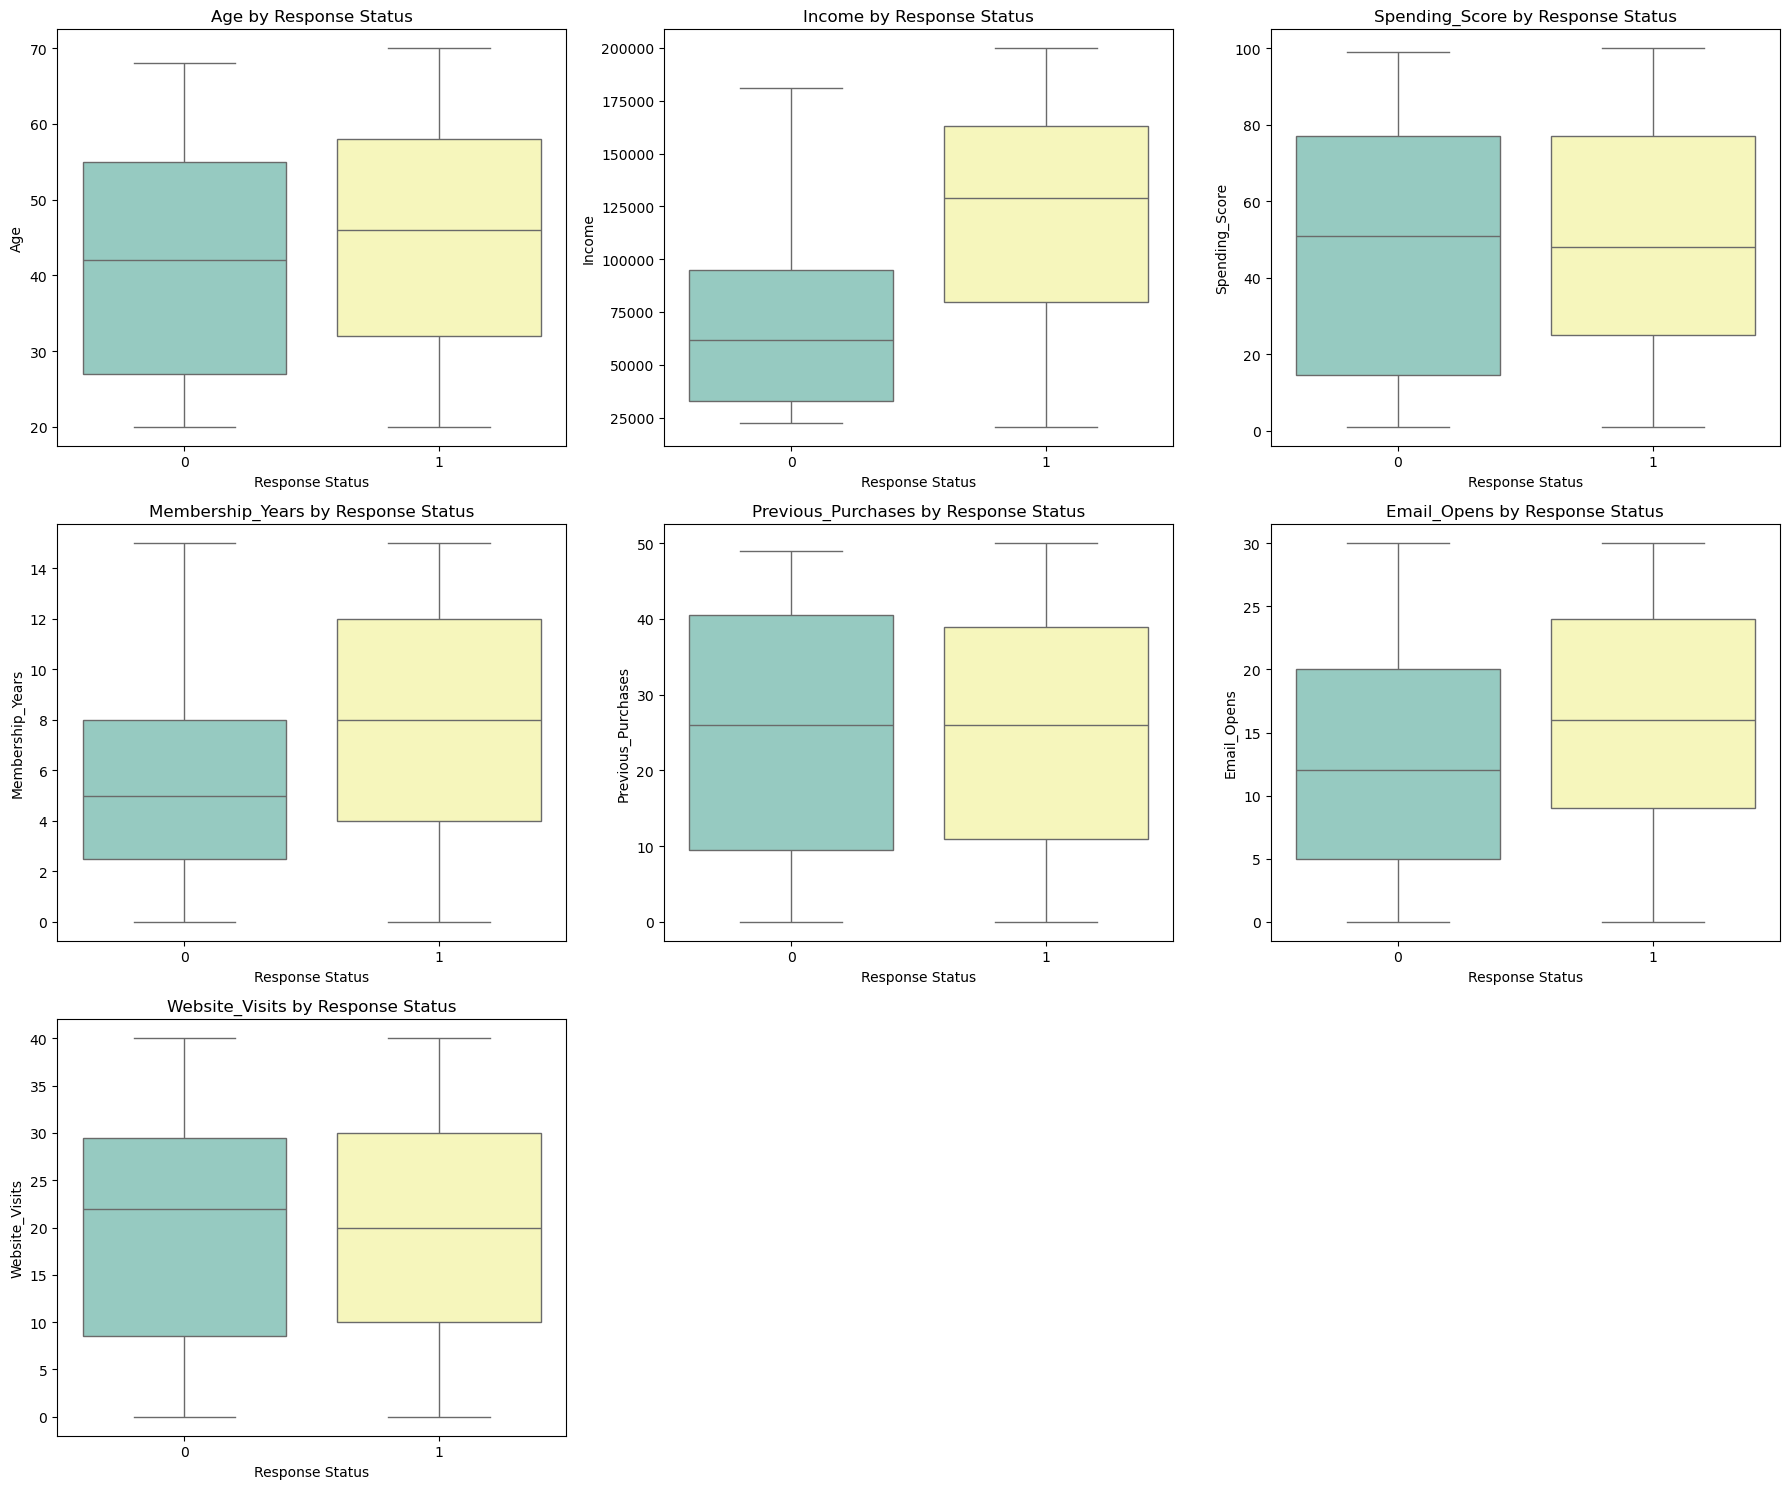

In [165]:
# Load and explore the dataset
assignment2_data = pd.read_csv('Assignment-Dataset/assignment2_marketing_campaign.csv')

assignment2_data.info()

# Check class distribution
print("Class Distribution:") 
print(assignment2_data['Responded'].value_counts())

# # Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Responded', data = assignment2_data, palette='Set2', hue='Responded' )
plt.title("Class Distribution: Responded vs Not Responded")
plt.xlabel("Response Status")
plt.ylabel("Count")
plt.show()

# Identify class imbalance
response_counts = assignment2_data['Responded'].value_counts(normalize=True)
print("\nClass Proportions:")
print(response_counts)

if response_counts.min() < 0.4:
    print("Potential class imbalance detected.")
else:
    print("Classes are relatively balanced.")

# 3. Visualize key features by response status
key_features = ['Age', 'Income', 'Spending_Score', 'Membership_Years', 
                'Previous_Purchases', 'Email_Opens', 'Website_Visits'] 

# Set up a 3x3 grid 
fig, axes = plt.subplots(3, 3, figsize=(18, 15)) 
axes = axes.flatten() # flatten to easily loop through

# Loop through features and plot 
for i, feature in enumerate(key_features): 
    sns.boxplot(x='Responded', y=feature, data=assignment2_data, 
                hue='Responded', palette='Set3', legend=False, ax=axes[i]) 
    axes[i].set_title(f"{feature} by Response Status") 
    axes[i].set_xlabel("Response Status") 
    axes[i].set_ylabel(feature)

# Remove any unused subplots because we have just 7 instead of 9 features
for j in range(len(key_features), 9): 
    fig.delaxes(axes[j]) 
plt.tight_layout() 
plt.show()

## Insight from Response Analysis

The boxplots reveal a clear story about who engages and who doesn’t. Customers who **responded** tend to be younger, earn more, and show stronger spending behavior compared to those who did not respond. They also have longer membership histories, more previous purchases, and higher levels of digital engagement, i.e opening more emails and visiting the website more often, making them the ideal target for personalized offers and retention strategies.


In [168]:
# Data preparation
X = assignment2_data.drop(['Customer_ID','Responded'], axis=1)
Y = assignment2_data['Responded']

# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [194]:
# Model A: Default Logistic Regression
log_modelA = LogisticRegression(random_state=42, max_iter=1000)
log_modelA.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

Confusion Matrix
   - Accuracy, Precision, Recall, F1-Score
   - ROC Curve and AUC Score

In [ ]:
# Evaluate Model A
Y_pred_A = log_modelA.predict (X_test)
Y_pred_A_prob = log_modelA.predict_proba(X_test)

# Show probability for the first test sample
Y_pred_A_prob[0, :]

array([0.06587849, 0.93412151])

Accuracy: 0.8533
Precision: 0.9275
Recall: 0.9143
F1 Score: 0.9209

Confusion Matrix:
 [[ 0  5]
 [ 6 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.93      0.91      0.92        70

    accuracy                           0.85        75
   macro avg       0.46      0.46      0.46        75
weighted avg       0.87      0.85      0.86        75



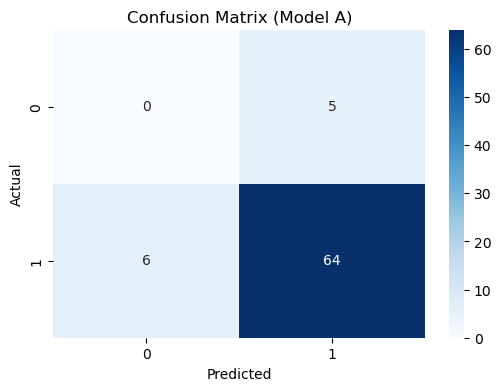

In [205]:
# Calculate and display classification metrics (Model A)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_A)

# Precision, Recall, F1
precision = precision_score(Y_test, Y_pred_A, average='binary')  
recall = recall_score(Y_test, Y_pred_A, average='binary')
f1 = f1_score(Y_test, Y_pred_A, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_A)
print("\nConfusion Matrix:\n", cm)

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_A))

#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Model A)")
plt.show()


In [187]:
# Model B: Balanced Logistic Regression
log_modelB = LogisticRegression(class_weight='balanced', 
                                random_state=42, max_iter=1000)
log_modelB.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Evaluate Model B
Y_pred_B = log_modelB.predict (X_test)
Y_pred_B_prob = log_modelB.predict_proba(X_test)

# Show probabily for teh first test sample
Y_pred_B_prob[0, :]

array([0.31225153, 0.68774847])

Accuracy: 0.6400
Precision: 0.9574
Recall: 0.6429
F1 Score: 0.7692

Confusion Matrix:
 [[ 3  2]
 [25 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.60      0.18         5
           1       0.96      0.64      0.77        70

    accuracy                           0.64        75
   macro avg       0.53      0.62      0.48        75
weighted avg       0.90      0.64      0.73        75



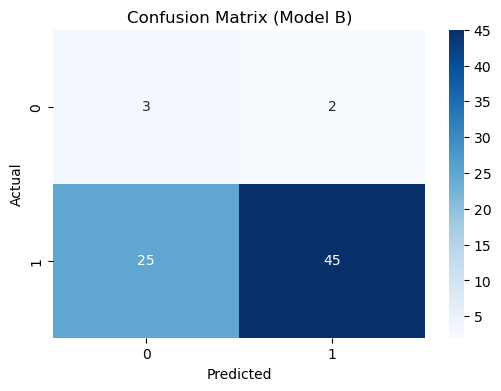

In [206]:
# Calculate and display classification metrics (model B)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_B)

# Precision, Recall, F1
precision = precision_score(Y_test, Y_pred_B, average='binary')  
recall = recall_score(Y_test, Y_pred_B, average='binary')
f1 = f1_score(Y_test, Y_pred_B, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_B)
print("\nConfusion Matrix:\n", cm)

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_B))

#Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Model B)")
plt.show()


AUC Score (Model A): 0.6371428571428571


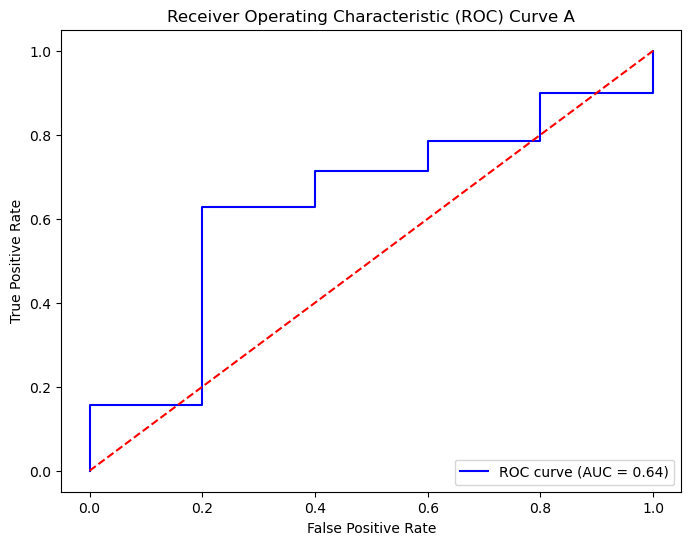

AUC Score (Model B): 0.6314285714285715


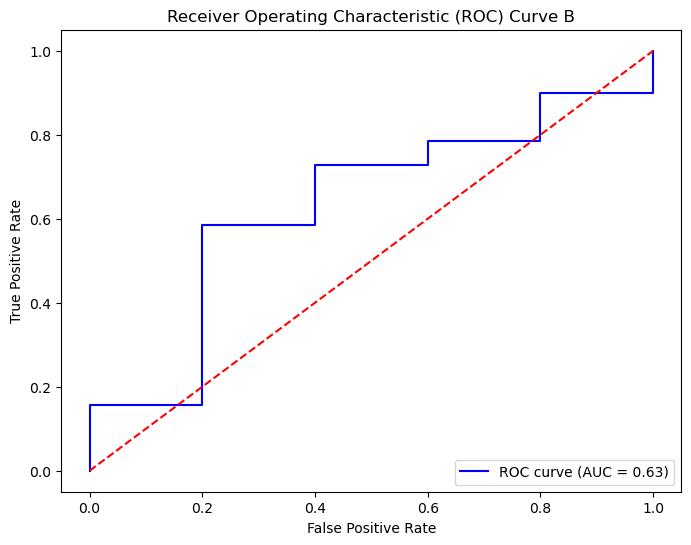

In [204]:
# ROC Curves comparison
# model A 
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the positive class (Responded = 1) 
Y_score = Y_pred_A_prob[:, 1]
# 1. Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

# 2. Compute AUC score
auc_score = roc_auc_score(Y_test, Y_score)
print("AUC Score (Model A):", auc_score)

# 3. Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve A')
plt.legend(loc="lower right")
plt.show()

# model B
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the positive class (Responded = 1) 
Y_score = Y_pred_B_prob[:, 1]
# 1. Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

# 2. Compute AUC score
auc_score = roc_auc_score(Y_test, Y_score)
print("AUC Score (Model B):", auc_score)

# 3. Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve B')
plt.legend(loc="lower right")
plt.show()

## Comparative Analysis

### Overall Performance
**Model A:** Accuracy (85%), Precision (92.8%), Recall (91.4%), F1 (92.1%).

**Model B:** Accuracy (64%), Precision (95.7%), Recall (64.3%), F1 (76.9%).

- **Model A** clearly performs better overall because it balances high precision and high recall, leading to a strong F1 score and accuracy.
- **Model B** has very high precision but sacrifices recall, which drags down its overall effectiveness.

### Effect of Class Balancing
- **Without balance (Model A):** The model focuses heavily on the majority class (Responded = 1). That’s why recall and precision for responders are excellent, but it completely ignores the minority class (Not Responded = 0).

- **With balance (Model B):** The balancing forces the model to pay more attention to the minority class. It finally identifies some non‑responders (3 TN), but this comes at the cost of missing many responders (recall drops sharply).

### Precision vs Recall Trade‑off
**Model A:** High precision and high recall for responders. Great at catching responders, but blind to non‑responders.

**Model B:** Very high precision (avoids false alarms), but recall is much lower. It misses many actual responders.

This is the classic trade‑off:

**Model A:** Biased toward responders, strong overall performance but unfair to non‑responders.

**Model B:** More balanced across classes, but weaker overall performance because it sacrifices recall.

---

## Business Recommendations:

### Which Model to Deploy and Why
Model A (without balance) should be deployed.

It achieves higher accuracy (85%), stronger recall (91%), and better F1 score (92%) compared to Model B.

In business terms, this means Model A is much better at identifying actual responders, which is critical for marketing campaigns. You don’t want to miss customers who are likely to engage.

Model B, while more balanced across classes, sacrifices recall and overall accuracy. Missing 25 responders (false negatives) is costly because those are potential customers you’d fail to target.

**Recommendation:** Deploy Model A because it maximizes campaign effectiveness by correctly identifying most responders.

### Threshold for Classifying Responses
By default, logistic regression uses a threshold of 0.5 (predict “Responded” if probability ≥ 0.5).

But thresholds can be adjusted depending on business goals:

If the goal is maximizing campaign reach (catch as many responders as possible): Lower the threshold slightly (e.g., 0.4). This increases recall, ensuring fewer responders are missed, though it may add some false positives.

If the goal is minimizing wasted effort/resources (only target highly likely responders): Raise the threshold (e.g., 0.6–0.7). This increases precision, ensuring you only target customers who are very likely to respond, but you’ll miss more actual responders.

**Recommendation:**

Start with the default 0.5 threshold for balanced performance.

If your business values maximizing engagement, consider lowering to 0.4.

If your business values cost efficiency, consider raising to 0.6.

### Final Business Guidance
Deploy Model A — it’s the stronger performer overall.

Tune the threshold based on campaign strategy:

Lower threshold for growth and reach.

Higher threshold for cost control and efficiency.

---

### Assignment 3: Multi-Class Classification

**Dataset:** `Assignment-Dataset/assignment3_credit_risk.csv`

**Objective:** Build a multi-class classification model to predict credit risk levels.

**Requirements:**
1. Load and explore the dataset:
   - Examine the distribution of risk levels (Low, Medium, High)
   - Analyze key features across different risk categories
   - Check for any data quality issues
2. Prepare the data:
   - Split into features and target (Risk_Category)
   - Split into training (70%) and testing (30%) sets with `random_state=42`
3. Train THREE classification models:
   - Logistic Regression (multi-class: `multi_class='ovr', random_state=42, max_iter=1000`)
   - Decision Tree Classifier (`max_depth=10, random_state=42`)
   - Random Forest Classifier (`n_estimators=100, max_depth=10, random_state=42`)
4. For each model, evaluate using:
   - Confusion Matrix (use heatmap visualization)
   - Classification Report (precision, recall, f1-score for each class)
   - Overall Accuracy
5. Analyze model performance:
   - Which risk level is easiest/hardest to predict?
   - Which model performs best for each risk category?
   - Are there any systematic misclassifications?
6. Feature importance:
   - Display the top 5 most important features from Random Forest
   - Explain how these features relate to credit risk

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load and explore the dataset
assignment3_data = pd.read_csv('Assignment-Dataset/assignment3_credit_risk.csv')
# Quick overview for data quality issues
display(assignment3_data.head()) 
print(assignment3_data.info()) 
print(assignment3_data.describe())

,Application_ID,Age,Income,Employment_Years,Credit_Score,Loan_Amount,Debt_to_Income,Previous_Defaults,Credit_History_Length,Risk_Category
0,APP0001,59,161867,28,570,77820,0.16,0,10,Low
1,APP0002,31,127727,10,430,68221,0.06,1,13,Medium
2,APP0003,58,214041,20,460,54707,0.61,0,24,Medium
3,APP0004,47,171730,26,489,85654,0.62,0,19,Medium
4,APP0005,23,84092,2,320,81038,0.01,3,5,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Application_ID         400 non-null    object 
 1   Age                    400 non-null    int64  
 2   Income                 400 non-null    int64  
 3   Employment_Years       400 non-null    int64  
 4   Credit_Score           400 non-null    int64  
 5   Loan_Amount            400 non-null    int64  
 6   Debt_to_Income         400 non-null    float64
 7   Previous_Defaults      400 non-null    int64  
 8   Credit_History_Length  400 non-null    int64  
 9   Risk_Category          400 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 31.4+ KB
None
              Age         Income  Employment_Years  Credit_Score  \
count  400.000000     400.000000        400.000000    400.000000   
mean    43.512500  137085.157500         14.307500    581.322500   

Risk_Category
Medium    162
Low       128
High      110
Name: count, dtype: int64
Risk_Category
Medium    40.5
Low       32.0
High      27.5
Name: proportion, dtype: float64


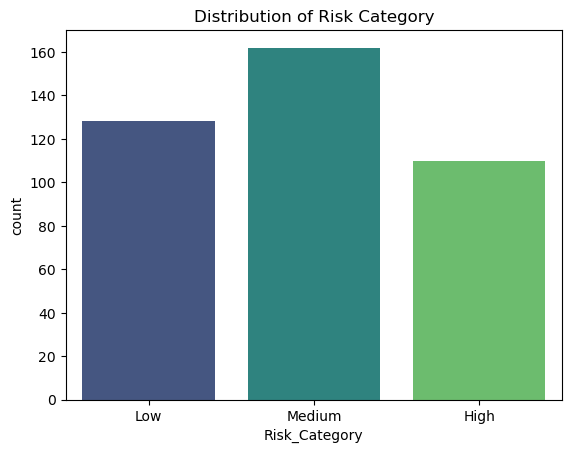

In [20]:
# Examine Distribution of Risk Levels
# Count distribution 
print(assignment3_data['Risk_Category'].value_counts()) 

# Percentage distribution 
print(assignment3_data['Risk_Category'].value_counts(normalize=True) * 100)

# Visualize distribution 
sns.countplot(x='Risk_Category', data=assignment3_data, palette='viridis', hue= 'Risk_Category') 
plt.title("Distribution of Risk Category") 
plt.show()

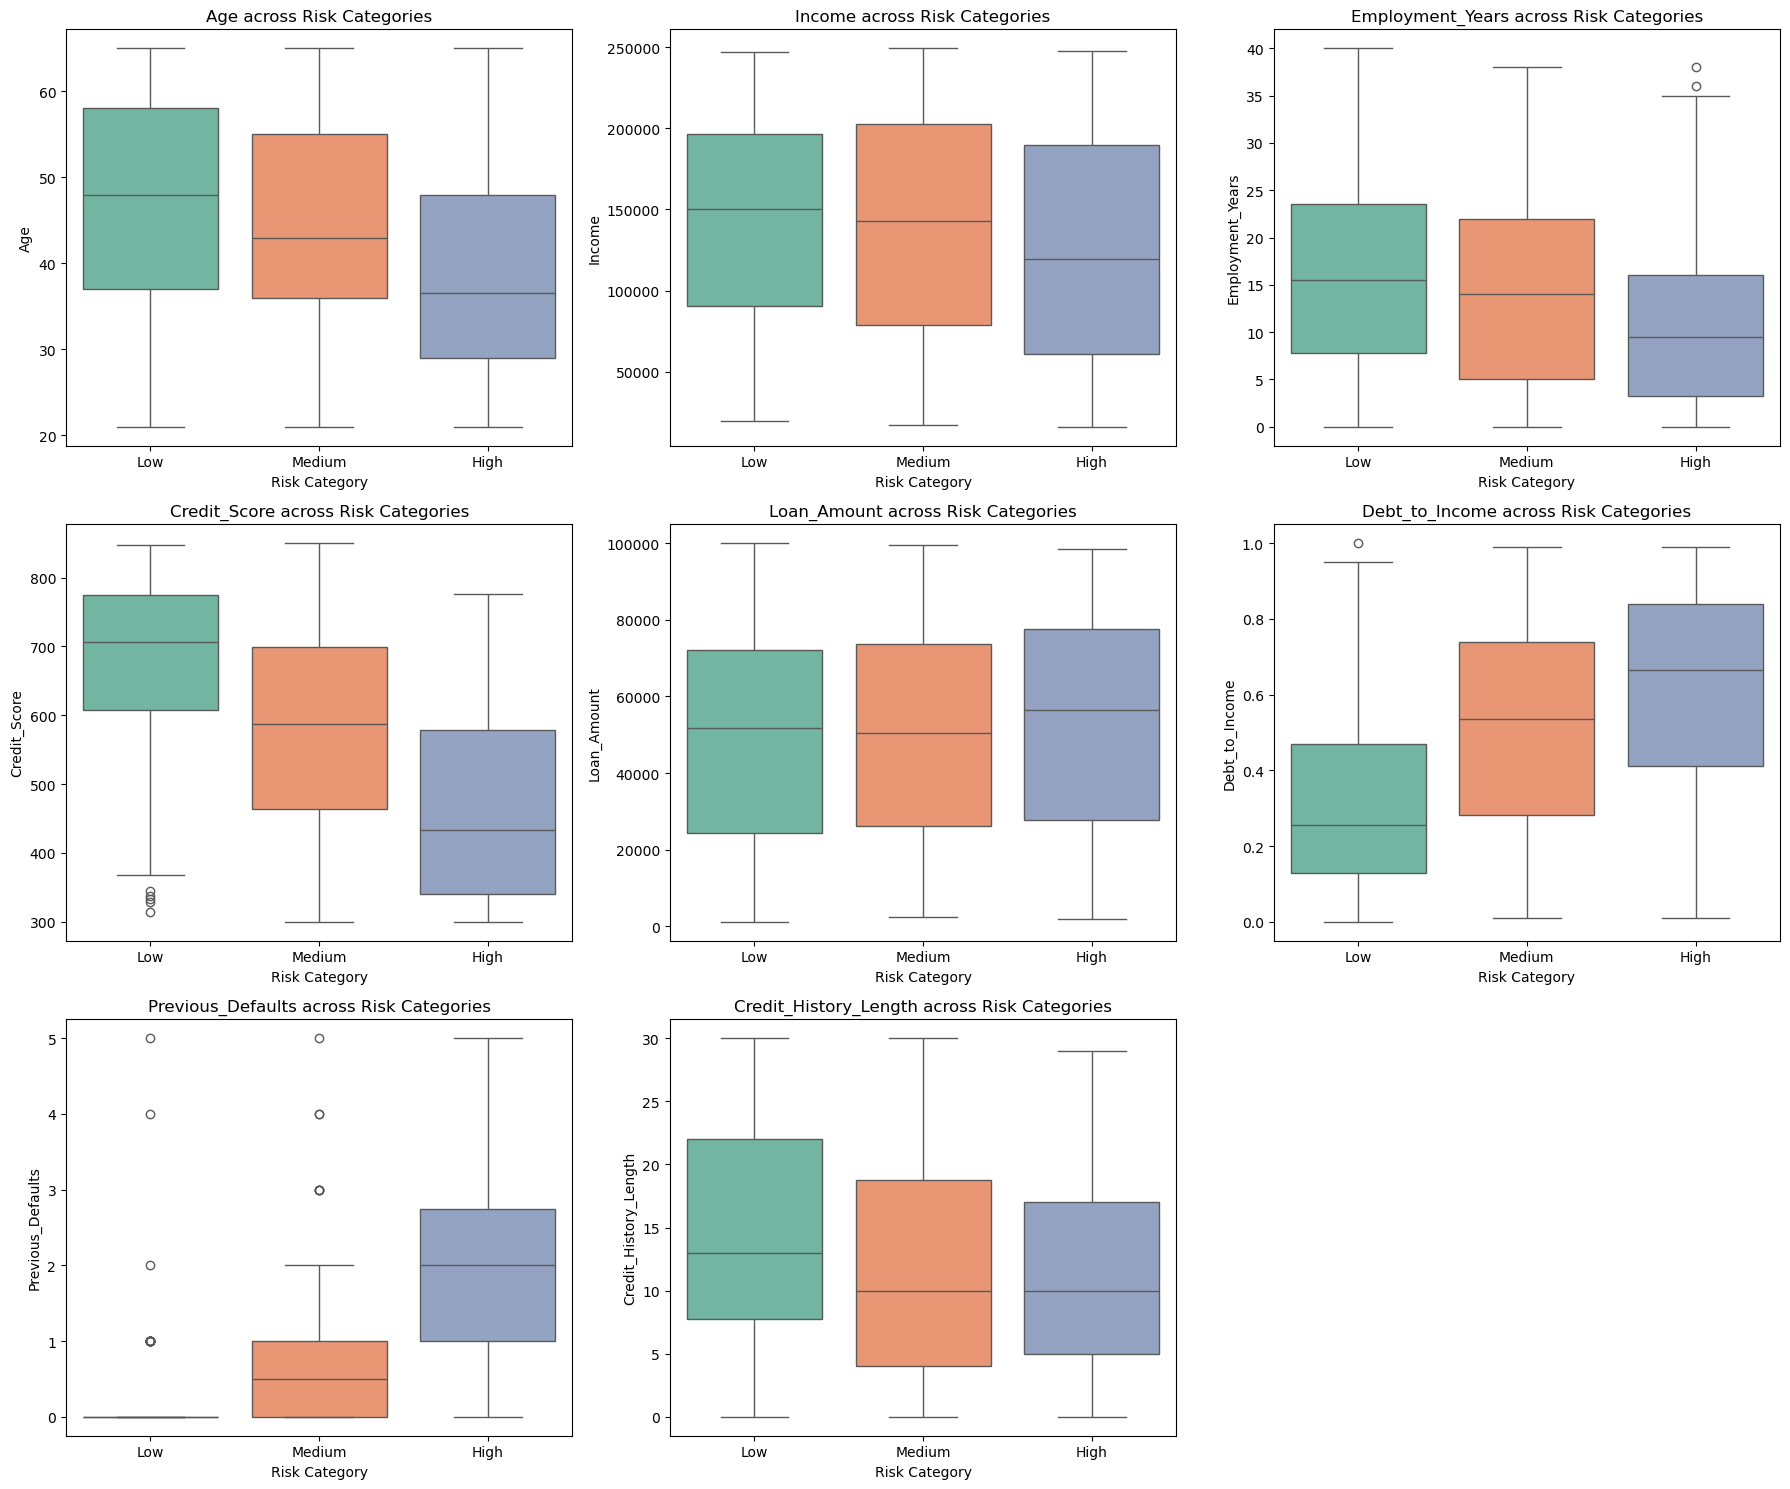

In [ ]:
# Analyze Key Features
features = ['Age', 'Income', 'Employment_Years', 'Credit_Score', 'Loan_Amount',
            'Debt_to_Income', 'Previous_Defaults', 'Credit_History_Length']

# Set up a 3x3 grid 
fig, axes = plt.subplots(3, 3, figsize=(18, 15)) 
axes = axes.flatten() # flatten to easily loop through

# Loop through features and plot 
for i, feature in enumerate(features): 
    sns.boxplot(x='Risk_Category', y=feature, data=assignment3_data, 
                hue='Risk_Category', palette='Set2', legend=False, ax=axes[i]) 
    axes[i].set_title(f"{feature} across Risk Categories") 
    axes[i].set_xlabel("Risk Category") 
    axes[i].set_ylabel(feature)

# Remove any unused subplots because we have just 7 instead of 9 features
for j in range(len(features), 9): 
    fig.delaxes(axes[j]) 
plt.tight_layout() 
plt.show()

## Risk Level Distribution Analysis
- Medium Risk: 162 cases (40.5%) of the dataset

- Low Risk: 128 cases (32.0%) of the dataset

- High Risk: 110 cases (27.5%) of the dataset

### Interpretation
Medium risk dominates

With ~40% of all records, Medium risk is the largest group.

This suggests that most individuals/customers fall into a “moderate” category rather than extreme ends.

Low and High risks are fairly balanced

Low (32%) and High (27.5%) are not too far apart.

This is good for modeling because we don’t have a severe imbalance (e.g., 90% in one class).

This means we can train models without heavy resampling or weighting, though we may still want to monitor performance on the smaller High‑risk group.

### Business Insight
- **Medium risk group (largest):** This is where most of our population sits. Business strategies should focus on monitoring and nudging this group, since they’re at the tipping point.

- **High risk group (critical):** Though smaller, these are the most important to flag for intervention (e.g., fraud detection, churn prevention, loan default risk).

- **Low risk group (stable):** Represents safer or more reliable cases. They may need less monitoring but are useful benchmarks.

In [36]:
# Data preparation
X = assignment3_data.drop(['Application_ID','Risk_Category'], axis =1)
Y = assignment3_data['Risk_Category']

#split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

In [47]:
# Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Model 1: Logistic Regression
from sklearn.multiclass import OneVsRestClassifier

log_model = OneVsRestClassifier(
    LogisticRegression(random_state=42, max_iter=1000)
)

log_model.fit(X_train_scaled, Y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 random_state=42))

In [ ]:
# Predict on test data
Y_log_pred = log_model.predict(X_test_scaled)

[[33  0  3]
 [ 1 28  3]
 [ 7 12 33]]


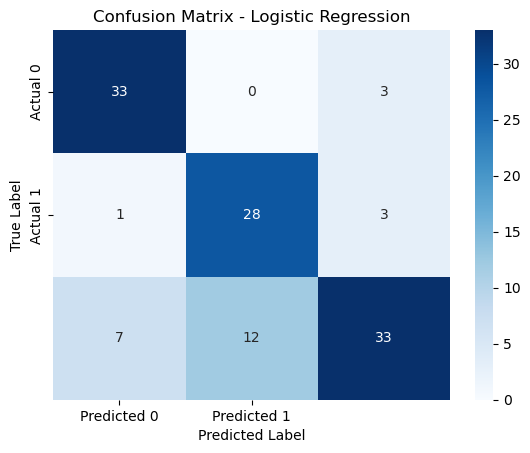

In [54]:
# Evaluate Logistic Regression

#1. Confusion Matrix
cm = confusion_matrix(Y_test, Y_log_pred)
print(cm)

# Visualize using heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [56]:
#2. Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(Y_test, Y_log_pred))

#3. Overall accuracy
accuracy = accuracy_score(Y_test, Y_log_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

Classification Report:

              precision    recall  f1-score   support

        High       0.80      0.92      0.86        36
         Low       0.70      0.88      0.78        32
      Medium       0.85      0.63      0.73        52

    accuracy                           0.78       120
   macro avg       0.78      0.81      0.79       120
weighted avg       0.79      0.78      0.78       120

Overall Accuracy: 0.7833


### INSIGHTS
#### Confusion Matrix Report
The confusion matrix shows that the model performs very well in classifying Low and High risk customers, with most instances correctly predicted. The main source of error occurs between the High and Medium risk categories, where several High risk cases are misclassified as Medium risk. Although the model successfully identifies the majority of High risk customers overall, these misclassifications are important from a business perspective because High risk customers may be treated as less risky than they actually are. The Medium risk category shows the highest level of confusion, indicating overlapping characteristics with both Low and High risk groups.

#### Classification Report
The classification report confirms that the model performs well overall, achieving an accuracy of 78.33%. It is particularly effective at identifying High Risk customers, with a recall of 92%, meaning most High risk cases are successfully detected. Performance is weaker for Medium Risk customers, which show the lowest recall, indicating confusion with both Low and High risk categories. These results align with the confusion matrix and suggest that additional features or more advanced models may improve separation of Medium Risk cases.

In [ ]:
# Model 2: Decision Tree Classifier model 
DT_model = DecisionTreeClassifier(max_depth=10, random_state=42)
DT_model.fit(X_train, Y_train) #No scaling needed

DecisionTreeClassifier(max_depth=10, random_state=42)

In [53]:
# Predict
Y_dt_pred = DT_model.predict(X_test)

[[30  0  6]
 [ 0 25  7]
 [ 6 11 35]]


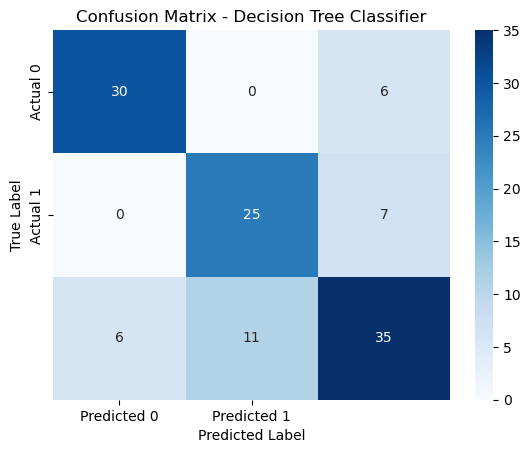

In [55]:
# Evaluate Decision Tree

#1. Confusion Matrix
cm = confusion_matrix(Y_test, Y_dt_pred)
print(cm)

# Visualize using heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [57]:
#2. Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(Y_test, Y_dt_pred))

#3. Overall accuracy
accuracy = accuracy_score(Y_test, Y_dt_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

Classification Report:

              precision    recall  f1-score   support

        High       0.83      0.83      0.83        36
         Low       0.69      0.78      0.74        32
      Medium       0.73      0.67      0.70        52

    accuracy                           0.75       120
   macro avg       0.75      0.76      0.76       120
weighted avg       0.75      0.75      0.75       120

Overall Accuracy: 0.7500


#### INSIGHTS

In [58]:
# Model 3: Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
RF_model.fit(X_train, Y_train) #No scaling needed also

RandomForestClassifier(max_depth=10, random_state=42)

In [59]:
# Predict
Y_rf_pred = RF_model.predict(X_test)

[[27  0  9]
 [ 0 26  6]
 [ 4  8 40]]


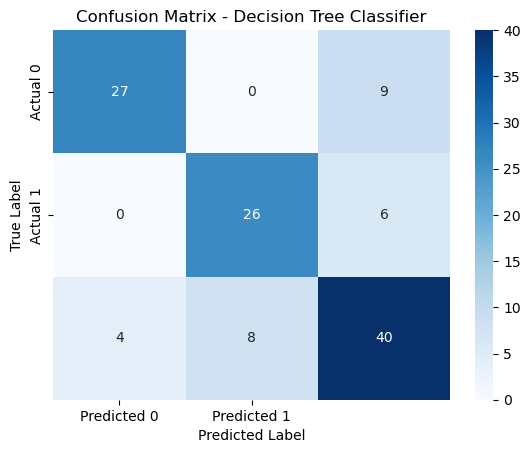

In [60]:
# Evaluate Random Forest
#1. Confusion Matrix
cm = confusion_matrix(Y_test, Y_rf_pred)
print(cm)

# Visualize using heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [61]:
#2. Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(Y_test, Y_rf_pred))

#3. Overall accuracy
accuracy = accuracy_score(Y_test, Y_rf_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

Classification Report:

              precision    recall  f1-score   support

        High       0.87      0.75      0.81        36
         Low       0.76      0.81      0.79        32
      Medium       0.73      0.77      0.75        52

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120

Overall Accuracy: 0.7750


### INSIGHTS

In [ ]:
# Feature importance analysis


**Performance Analysis:**

*Write your analysis here*

**Feature Importance Interpretation:**

*Explain how the top features relate to credit risk*

---

## Part 3: Assessment Project

This is a comprehensive project that combines all the concepts learned this week.

### Assessment: Customer Churn Prediction - End-to-End ML Project

**Dataset:** `Assessment-Dataset/customer_churn_prediction.csv`

**Business Context:**
You are a data scientist at a telecommunications company. The company is losing customers to competitors and wants to identify which customers are at risk of churning (leaving the service). Your task is to build a comprehensive machine learning solution to:
1. Predict which customers will churn
2. Identify the key factors driving churn
3. Provide actionable insights to the retention team

**Dataset Description:**
The dataset contains 500 customer records with 19 features including:
- Demographics: Age, Gender
- Account info: Tenure, Contract_Type, Payment_Method
- Service usage: Monthly_Charges, Total_Charges, Internet_Service, Phone_Service
- Support metrics: Support_Calls, Customer_Satisfaction_Score
- Service features: Streaming_TV, Streaming_Movies, Online_Security, Tech_Support
- Target: Churn (0 = active, 1 = churned)

---

### Phase 1: Data Understanding & Exploration

Write a summary of your findings from EDA (3-5 key insights)

**EDA Summary:**

*Write your key findings here*

1. 
2. 
3. 
4. 
5. 

---

### Phase 2: Data Preprocessing

---

### Phase 3: Model Building & Evaluation

---

### Phase 4: Feature Importance & Insights

---

### Phase 5: Business Recommendations

**Step 5.1:** Model selection justification:

Based on your analysis, answer the following:

1. **Which model would you recommend for deployment and why?**
   - Consider accuracy, interpretability, and business needs
   - Think about the cost of false positives vs false negatives

2. **What probability threshold would you use for classification?**
   - Default is 0.5, but should it be adjusted?
   - Consider the business impact of missing a churner vs false alarms

3. **How confident are you in the model's predictions?**
   - What are the limitations?
   - What additional data might improve performance?

**Model Selection:**

*Write your answer here*

**Step 5.2:** Actionable recommendations for the retention team:

Based on your feature importance analysis and model insights, provide 5-7 specific, actionable recommendations:

Example format:
- **Recommendation 1:** Target customers with month-to-month contracts for conversion to annual contracts
  - *Insight:* 60% of churners had month-to-month contracts
  - *Action:* Offer 10% discount for switching to annual contract
  - *Expected Impact:* Reduce churn by 15-20% in this segment

**Business Recommendations:**

1. **Recommendation 1:**
   - Insight:
   - Action:
   - Expected Impact:

2. **Recommendation 2:**
   - Insight:
   - Action:
   - Expected Impact:

3. **Recommendation 3:**
   - Insight:
   - Action:
   - Expected Impact:

4. **Recommendation 4:**
   - Insight:
   - Action:
   - Expected Impact:

5. **Recommendation 5:**
   - Insight:
   - Action:
   - Expected Impact:

**Step 5.3:** Implementation plan:

Outline how this model would be deployed in production:
1. How often should the model be retrained?
2. What monitoring metrics would you track?
3. How would you measure the business impact?
4. What are the next steps for model improvement?

**Implementation Plan:**

1. **Retraining Schedule:**
   
2. **Monitoring Metrics:**
   
3. **Business Impact Measurement:**
   
4. **Next Steps:**